##  Comparison between DBSCAN, k-Means, and Hierarchical Clustering Algorithms using two different datasets

### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons, make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

In [2]:
from sklearn.metrics import silhouette_samples

def plot_clustering_results(X, labels, centers, silhouette_avg, n_clusters=4, dataset_name=""):
    """
    Plots the clustering results and the silhouette scores for each sample.

    Parameters:
    X : array-like, shape (n_samples, n_features)
        The input data points.
    labels : array-like, shape (n_samples,)
        The cluster labels for each data point.
    centers : array-like, shape (n_clusters, n_features), optional
        The coordinates of the cluster centers. If None, no centers are plotted.
    silhouette_avg : float
        The average silhouette score for all the samples.
    n_clusters : int, optional, default=4
        The number of clusters.

    Returns:
    None
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

    # Plot the clustering result
    ax1.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
    if centers is not None:
        ax1.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
    ax1.set_xlabel('Feature 1')
    ax1.set_ylabel('Feature 2')
    ax1.set_title(f'{dataset_name} - Clustering Result')

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / n_clusters)
        ax2.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        ax2.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10

    ax2.set_title(f'{dataset_name} - The silhouette plot for the various clusters.')
    ax2.set_xlabel("The silhouette coefficient values")
    ax2.set_ylabel("Cluster label")

    ax2.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax2.set_yticks([])
    ax2.set_xticks(np.arange(-0.1, 1.1, 0.2))

    plt.show()

### First dataset:
make_moons(n_samples=300, noise=0.05) → Good for DBSCAN (non-spherical clusters).

c:\GitHub\.pixi\envs\default\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


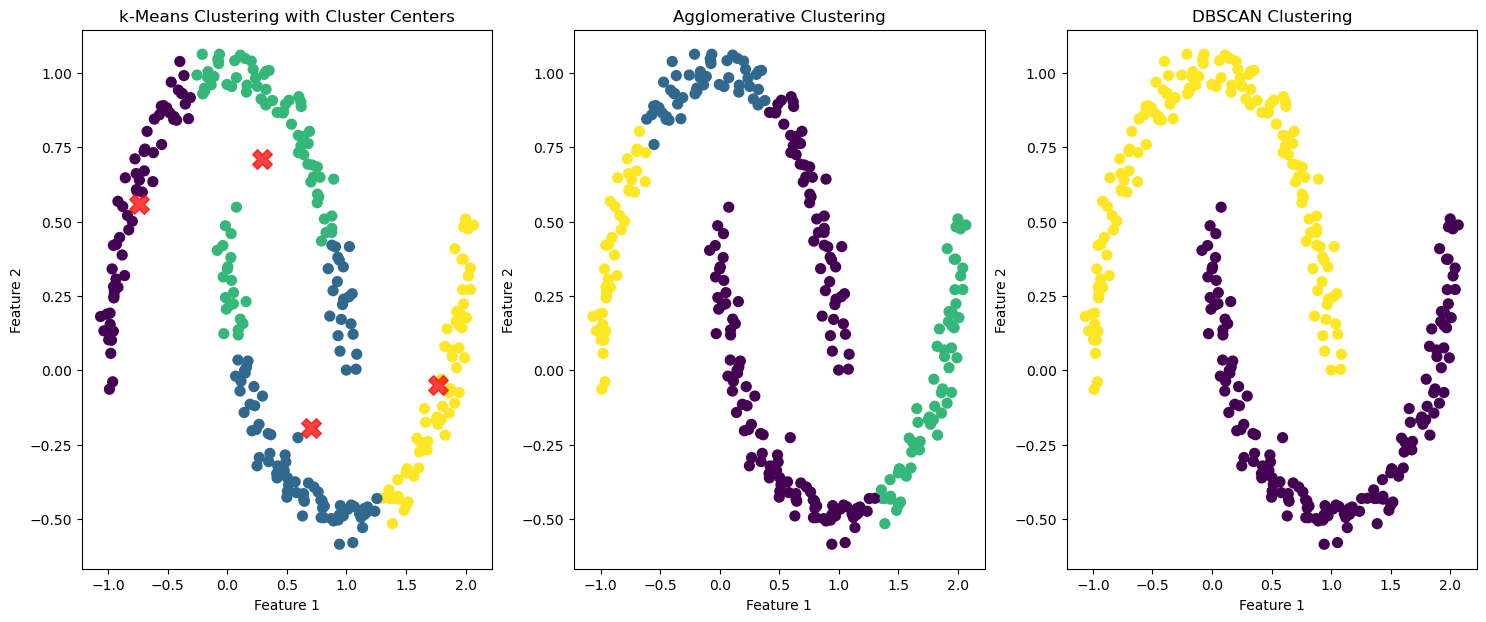

Silhouette Score (k-Means): 0.4578026645734168
Silhouette Score (Agglomerative): 0.41004054567844084
Silhouette Score (DBSCAN): 0.3291006748202209
Estimated number of clusters in DBSCAN: 2
Estimated number of noise points in DBSCAN: 0


In [4]:

# Generate synthetic data
X, y = make_moons(n_samples=300, noise=0.05)

# Train a k-Means clustering model
kmeans = KMeans(n_clusters=4, random_state=42, max_iter=50, n_init='auto')
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Perform agglomerative clustering
agg_clustering = AgglomerativeClustering(n_clusters=4, linkage="average", metric="manhattan", distance_threshold=None)
y_agg = agg_clustering.fit_predict(X)

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.3, min_samples=10).fit(X)
labels = dbscan.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)


fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 7))

# Plot the k-Means clustering result
ax1.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
ax1.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')
ax1.set_title('k-Means Clustering with Cluster Centers')

# Plot the agglomerative clustering result
ax2.scatter(X[:, 0], X[:, 1], c=y_agg, s=50, cmap='viridis')
ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')
ax2.set_title('Agglomerative Clustering')

# Plot the DBSCAN clustering result
ax3.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
ax3.set_xlabel('Feature 1')
ax3.set_ylabel('Feature 2')
ax3.set_title('DBSCAN Clustering')

plt.show()

# print the silhouette scores
silhouette_avg_kmeans = silhouette_score(X, y_kmeans)
silhouette_avg_agg = silhouette_score(X, y_agg)
print(f"Silhouette Score (k-Means): {silhouette_avg_kmeans}")
print(f"Silhouette Score (Agglomerative): {silhouette_avg_agg}")

if n_clusters_ > 1:
    silhouette_avg_dbscan = silhouette_score(X, labels)
    print(f"Silhouette Score (DBSCAN): {silhouette_avg_dbscan}")
else:
    print("Silhouette Score (DBSCAN): Not defined (only one cluster or all noise)")

print("Estimated number of clusters in DBSCAN: %d" % n_clusters_)
print("Estimated number of noise points in DBSCAN: %d" % n_noise_)

### Second Dataset:
#### make_blobs(n_samples=300, centers=3, cluster_std=[1.0, 2.5, 0.5])

c:\GitHub\.pixi\envs\default\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


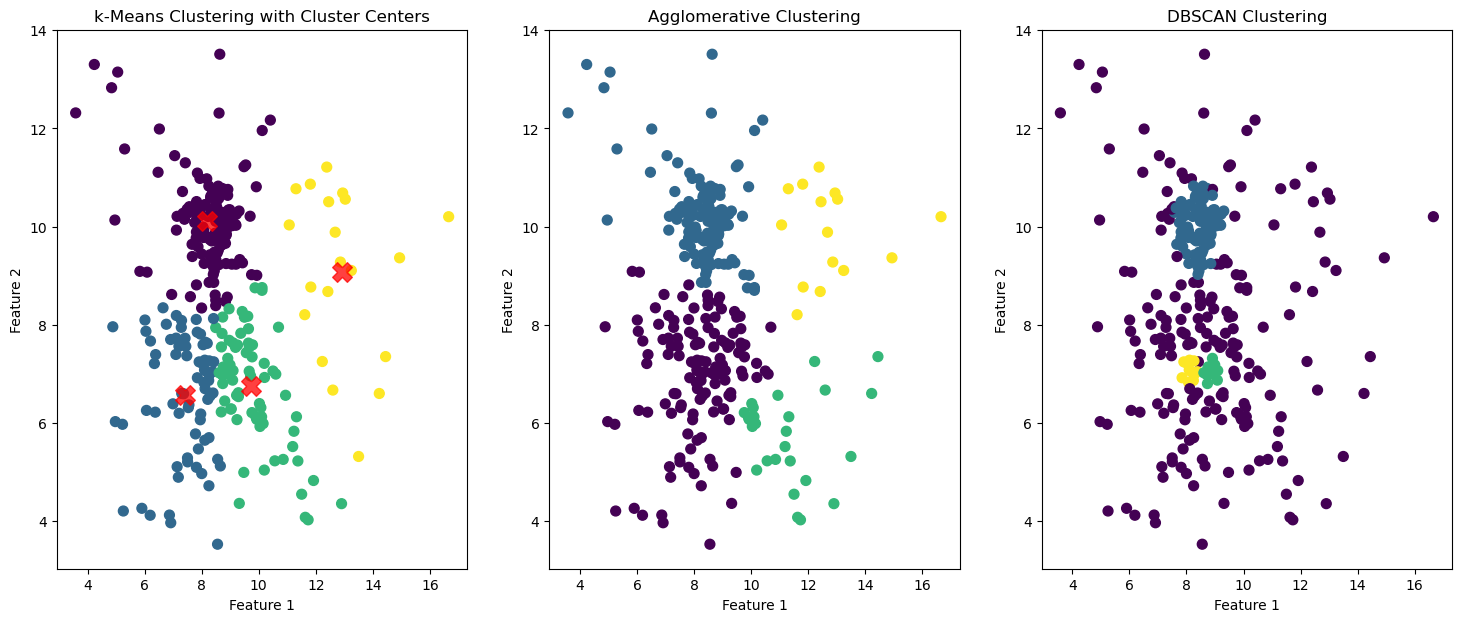

Silhouette Score (k-Means): 0.42413200299074566
Silhouette Score (Agglomerative): 0.43318553836519724
Silhouette Score (DBSCAN): -0.05509623262520144
Estimated number of clusters in DBSCAN: 3
Estimated number of noise points in DBSCAN: 190


In [5]:
# Generate synthetic data
X, y = make_blobs(n_samples=300, centers=3, cluster_std=[1.0, 2.5, 0.5])

# Train a k-Means clustering model
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Perform agglomerative clustering
agg_clustering = AgglomerativeClustering(n_clusters=4)
y_agg = agg_clustering.fit_predict(X)

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.3, min_samples=10).fit(X)
labels = dbscan.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)


fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 7))

# Plot the k-Means clustering result
ax1.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
ax1.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')
ax1.set_title('k-Means Clustering with Cluster Centers')

# Plot the agglomerative clustering result
ax2.scatter(X[:, 0], X[:, 1], c=y_agg, s=50, cmap='viridis')
ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')
ax2.set_title('Agglomerative Clustering')

# Plot the DBSCAN clustering result
ax3.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
ax3.set_xlabel('Feature 1')
ax3.set_ylabel('Feature 2')
ax3.set_title('DBSCAN Clustering')

plt.show()

# print the silhouette scores
silhouette_avg_kmeans = silhouette_score(X, y_kmeans)
silhouette_avg_agg = silhouette_score(X, y_agg)
print(f"Silhouette Score (k-Means): {silhouette_avg_kmeans}")
print(f"Silhouette Score (Agglomerative): {silhouette_avg_agg}")

if n_clusters_ > 1:
    silhouette_avg_dbscan = silhouette_score(X, labels)
    print(f"Silhouette Score (DBSCAN): {silhouette_avg_dbscan}")
else:
    print("Silhouette Score (DBSCAN): The algorithm is not performing.")

print("Estimated number of clusters in DBSCAN: %d" % n_clusters_)
print("Estimated number of noise points in DBSCAN: %d" % n_noise_)